In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Credit Card Default II (balance).csv")

In [3]:
df.head()

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1


## Check for correlation and Identify X variables

In [4]:
cor = df.corr()

In [5]:
cor_target = abs(cor["default"])

In [6]:
features = cor_target[cor_target>0.1]
print(features.sort_values())

loan       0.508285
age        0.653537
default    1.000000
Name: default, dtype: float64


In [7]:
print(df.isnull().sum().sort_values())

income     0
age        0
loan       0
default    0
dtype: int64


## Data Cleaning, checking for outlier

In [8]:
df = df.dropna()

for i in df.columns:
    df1 = pd.to_numeric(df[i], errors = 'coerce')
    df = df[df1.notnull()]
print(df)

            income        age          loan  default
0     66155.925100  59.017015   8106.532131        0
1     34415.153970  48.117153   6564.745018        0
2     57317.170060  63.108049   8020.953296        0
3     42709.534200  45.751972   6103.642260        0
4     66952.688850  18.584336   8770.099235        1
...            ...        ...           ...      ...
3423  60903.191726  21.933924  10367.081892        1
3424  62235.644695  25.033016   8083.900063        1
3425  25597.850590  26.350344   3810.110335        1
3426  48164.194974  23.141976   6529.652892        1
3427  33055.808635  26.289612   5351.851138        1

[3428 rows x 4 columns]


In [9]:
df["age"] = df["age"].abs()

In [10]:
X = df.iloc[:,0:3]

In [11]:
Y = df.iloc[:,3]

## Check for Outliers


In [12]:
import numpy as np

In [13]:
from scipy import stats

In [14]:
z = stats.zscore(df.astype(np.float))

<ipython-input-14-93546453b09b>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = stats.zscore(df.astype(np.float))


In [15]:
z = np.abs(z)
print(z)

[[1.45728987 1.90909336 0.79221752 1.        ]
 [0.74335698 1.04754024 0.30647137 1.        ]
 [0.8444825  2.23245925 0.76525557 1.        ]
 ...
 [1.35467707 0.67296434 0.56138722 1.        ]
 [0.20988967 0.92656202 0.29541546 1.        ]
 [0.83760293 0.67776473 0.07565566 1.        ]]


In [16]:
f = (z<3).all(axis = 1)
print(f)

[ True  True  True ...  True  True  True]


In [17]:
df = df[f]
df

,income,age,loan,default
0,66155.925100,59.017015,8106.532131,0
1,34415.153970,48.117153,6564.745018,0
2,57317.170060,63.108049,8020.953296,0
3,42709.534200,45.751972,6103.642260,0
4,66952.688850,18.584336,8770.099235,1
...,...,...,...,...
3423,60903.191726,21.933924,10367.081892,1
3424,62235.644695,25.033016,8083.900063,1
3425,25597.850590,26.350344,3810.110335,1
3426,48164.194974,23.141976,6529.652892,1


## Check for Collinearity


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif_data = pd.DataFrame()

In [20]:
vif_data["feature"] = X.columns

In [21]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]


In [22]:
print(vif_data)

  feature        VIF
0  income  12.182478
1     age   5.139367
2    loan   6.212651


## Data Visualisation

array([[<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'loan'}>,
        <AxesSubplot:title={'center':'default'}>]], dtype=object)

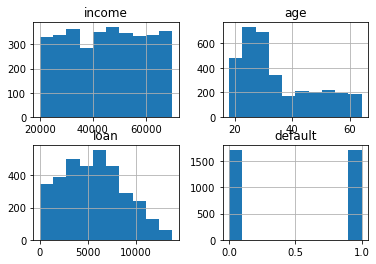

In [23]:
df.hist()

In [24]:
import seaborn as sns

<AxesSubplot:>

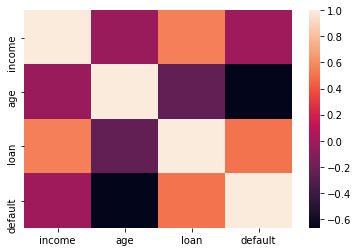

In [25]:
sns.heatmap(df.corr())

## Normalisation of X Variables

In [26]:
pd.set_option('display.max_rows', 10)

In [27]:
df=(df-df.min())/(df.max()-df.min())

In [28]:
print(df)

        income       age      loan  default
0     0.923176  0.892092  0.588837      0.0
1     0.288122  0.654708  0.476827      0.0
2     0.746334  0.981189  0.582620      0.0
3     0.454072  0.603198  0.443328      0.0
4     0.939117  0.011524  0.637045      1.0
...        ...       ...       ...      ...
3423  0.818082  0.084473  0.753066      1.0
3424  0.844741  0.151967  0.587193      1.0
3425  0.111709  0.180657  0.276703      1.0
3426  0.563206  0.110783  0.474278      1.0
3427  0.260925  0.179334  0.388711      1.0

[3428 rows x 4 columns]


## Split train test, train, predict

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 2)

In [31]:
print(X_train, X_test, Y_train, Y_test)

            income        age         loan
2993  68924.039892  28.230691  9846.870552
647   20346.469050  35.716074   656.033188
194   35045.131410  28.653284  2382.466772
1485  23007.387880  48.972524  2296.795327
501   35578.234110  42.394597  3640.848886
...            ...        ...          ...
2347  38570.301201  21.076165  5624.725821
1608  62507.354780  27.957027  6590.777230
2541  46735.764007  20.748593  6961.288779
2575  48325.025343  29.134378  7739.657837
3240  24323.204595  25.965609  4181.273920

[2399 rows x 3 columns]             income        age         loan
3383  25828.190520  21.784311  3663.849868
158   62246.727250  31.081885   406.720769
95    53601.812440  20.240621  9601.375482
3371  35428.286209  27.943003  6760.350493
663   27521.040340  35.086597  2699.851346
...            ...        ...          ...
1864  34722.964830  22.223387  4073.411901
3326  57576.545973  33.784809  9856.570014
2164  20164.261018  26.782124  2636.287769
2745  58392.893702  25.830621

## Logistic Regression

In [32]:
from sklearn import linear_model

In [33]:
model = linear_model.LogisticRegression()

In [34]:
model.fit(X_train, Y_train)

LogisticRegression()

In [35]:
pred = model.predict(X_train)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(Y_train, pred)

In [38]:
print(cm)

[[1130   79]
 [  38 1152]]


In [39]:
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))

In [40]:
print(accuracy) #Train set Accuracy

0.9512296790329304


In [41]:
pred = model.predict(X_test)

In [42]:
cm = confusion_matrix(Y_test, pred)

In [43]:
print(cm)

[[466  39]
 [ 16 508]]


In [44]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))

In [45]:
print(accuracy) #Test set Accuracy

0.9465500485908649


# Decision Tree

In [46]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [47]:
import math
from sklearn.model_selection import GridSearchCV

model = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1, 20)], min_samples_split = [i for i in range(3, 20)]))
grid_results = grid.fit(X_train, Y_train)
grid_results.best_params_

{'max_depth': 9, 'min_samples_split': 4}

In [48]:
model = tree.DecisionTreeClassifier(max_depth = grid_results.best_params_["max_depth"], min_samples_split = grid_results.best_params_["min_samples_split"])
model.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=9, min_samples_split=4)

In [49]:
pred = model.predict(X_train)

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(Y_train, pred)

In [52]:
print(cm)

[[1207    2]
 [   3 1187]]


In [53]:
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))

In [54]:
print(accuracy)

0.9979157982492706


In [55]:
pred = model.predict(X_test)

In [56]:
cm = confusion_matrix(Y_test, pred)

In [57]:
print(cm)

[[497   8]
 [  3 521]]


In [58]:
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

0.989310009718173


## Random Forest 

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model = RandomForestClassifier(max_depth = 3)

In [61]:
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3)

In [62]:
pred = model.predict(X_train)

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cm = confusion_matrix(Y_train, pred)

In [65]:
print(cm)

[[1083  126]
 [   1 1189]]


In [66]:
accuracy = (cm[0,0] + cm[1,1])/ sum(sum(cm))
print(accuracy)

0.9470612755314715


In [67]:
pred = model.predict(X_test)

In [68]:
cm = confusion_matrix(Y_test, pred)

In [69]:
print(cm)

[[449  56]
 [  0 524]]


In [70]:
accuracy = (cm[0,0] + cm[1,1])/ sum(sum(cm))
print(accuracy)

0.9455782312925171


## XGBoost 

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:

model = GradientBoostingClassifier()
grid = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1, 20)]))
grid_results = grid.fit(X_train, Y_train)
grid_results.best_params_

model = GradientBoostingClassifier(max_depth=grid_results.best_params_["max_depth"])

In [73]:
model.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=5)

In [74]:
pred = model.predict(X_train)

In [75]:
cm = confusion_matrix(Y_train, pred)

In [76]:
print(cm)

[[1209    0]
 [   0 1190]]


In [77]:
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

1.0


In [78]:
pred = model.predict(X_test)

In [79]:
cm = confusion_matrix(Y_test, pred)

In [80]:
print(cm)

[[497   8]
 [  1 523]]


In [81]:
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

0.9912536443148688


In [82]:
import joblib
joblib.dump(model, "defaultXGBoost")

['defaultXGBoost']

## Neural Network

In [83]:
from keras.models import Sequential

In [84]:
from keras.layers import Dense, Dropout

In [85]:
model = Sequential()

In [86]:
model.add(Dense(10, input_dim = 3, activation = "relu"))

In [87]:
model.add(Dropout(0.2))

In [88]:
model.add(Dense(1, activation = "sigmoid"))

In [89]:
model.compile(loss = 'binary_crossentropy', metrics = ["accuracy"])

In [90]:
model.fit(X_train, Y_train, batch_size = 10, epochs = 10)

Epoch 1/10
240/240 [==============================] - 1s 1ms/step - loss: 11627.4443 - accuracy: 0.4927
Epoch 2/10
240/240 [==============================] - 0s 1ms/step - loss: 1737.2051 - accuracy: 0.4931
Epoch 3/10
240/240 [==============================] - 0s 1ms/step - loss: 805.4478 - accuracy: 0.6207
Epoch 4/10
240/240 [==============================] - 0s 1ms/step - loss: 306.8425 - accuracy: 0.6353
Epoch 5/10
240/240 [==============================] - 0s 1ms/step - loss: 33.4685 - accuracy: 0.6565
Epoch 6/10
240/240 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.7145
Epoch 7/10
240/240 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.7453
Epoch 8/10
240/240 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7982
Epoch 9/10
240/240 [==============================] - 0s 997us/step - loss: 0.4398 - accuracy: 0.8349
Epoch 10/10
240/240 [==============================] - 0s 963us/step - loss: 0.4449 - 

In [91]:
model.evaluate(X_test, Y_test)

33/33 [==============================] - 0s 967us/step - loss: 0.3936 - accuracy: 0.8649


[0.3935592472553253, 0.8649173974990845]

In [92]:
pred=model.predict(X_train)
pred=np.where(pred>0.5,1,0)
cm=confusion_matrix(Y_train, pred)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)


[[ 888  321]
 [  39 1151]]
0.8499374739474781


In [93]:
pred=model.predict(X_test)
pred=np.where(pred>0.5,1,0)
cm=confusion_matrix(Y_test, pred)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)


[[377 128]
 [ 11 513]]
0.8649173955296404


In [94]:
from keras.models import load_model
model.save("default")

INFO:tensorflow:Assets written to: default\assets


In [95]:
model.save("default")

INFO:tensorflow:Assets written to: default\assets
